In [23]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport

In [24]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
target = "Class"

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

<Axes: >

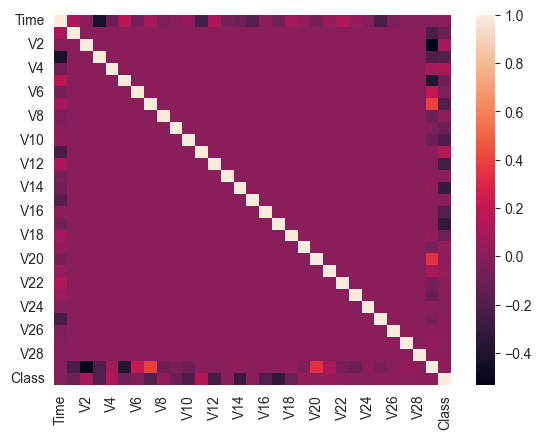

In [7]:
corr = df.corr()
sns.heatmap(corr)

In [8]:
# Sort by timestamp
df = df.sort_values(by='Time')
label = df[target]
data = df.drop([target], axis=1)
# Define train-test split ratio
train_size = 0.8  # 80% train, 20% test
train_index = int(len(df) * train_size)

# Split data

x_test = data.iloc[train_index:]
y_test = label[train_index:]
df = df.iloc[:train_index]

print("Training Data:")
print(len(df))
print("\nTesting Data:")
print(len(x_test))

Training Data:
227845

Testing Data:
56962


In [9]:
from sklearn.decomposition import PCA
import umap

x_pca = df.drop(columns=[target])
x_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(x_pca.values)
x_reduced_pca = pd.DataFrame(x_reduced_pca, columns=["x", "y"])
x_reduced_pca[target] = df[target]
x_reduced_pca = x_reduced_pca.sample(n=500)

# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x_reduced_pca)
# umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
# x_umap_reduced = umap_model.fit_transform(x_scaled)


<Axes: xlabel='x', ylabel='y'>

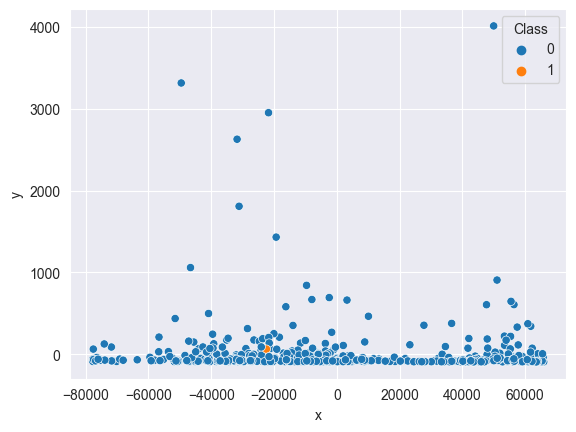

In [10]:
sns.scatterplot(
    data=x_reduced_pca,
    x="x",
    y="y",
    hue=target
)

In [11]:
corr = df.corr()['Class'].drop('Class').sort_values(ascending=True)
corr

V17      -0.364373
V14      -0.312901
V12      -0.269285
V10      -0.240082
V16      -0.220171
V3       -0.219400
V7       -0.217468
V18      -0.130390
V1       -0.117084
V5       -0.115750
V9       -0.102859
V6       -0.044995
Time     -0.012719
V15      -0.006755
V24      -0.005974
V23      -0.003404
V13      -0.002744
V25       0.001123
V22       0.002175
V26       0.003075
Amount    0.005954
V28       0.007110
V20       0.020169
V27       0.021584
V8        0.023356
V19       0.040129
V21       0.044419
V2        0.102593
V4        0.139911
V11       0.164506
Name: Class, dtype: float64

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(12, 3, figsize=(100, 200))  # 2 rows x 3 columns
axes = axes.flatten()  # Flatten axes for easy indexing
for idx, col in enumerate(df.columns):
    sns.boxplot(x="Class", y=col, data=df, ax=axes[idx])
    axes[idx].set_title(col)
plt.show()
# axes[0].set_title('V17 vs Class Negative Correlation')

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

exclude = ["Time", "Amount"]
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()


def split_data(df, standardize=False, normalize=True, time_based=True):
    df = df.sort_values(by='Time')
    label = df[target]
    data = df.drop([target], axis=1)
    columns = [c for c in data.columns.values if c not in exclude]
    if standardize:
        data[columns] = standard_scaler.fit_transform(data[columns])
    if normalize:
        data[columns] = min_max_scaler.fit_transform(data[columns])
    if time_based:
        train_size = 0.7 
        train_index = int(len(df) * train_size)
        x_train = data.iloc[:train_index]
        x_val = data.iloc[train_index:]
        y_train = label.iloc[:train_index]
        y_val = label.iloc[train_index:]
    else:
        x_train, x_val, y_train, y_val = train_test_split(data, label, test_size=0.3, random_state=42, stratify=label)
    return x_train, x_val, y_train, y_val

In [14]:
smote = SMOTE(random_state=42)


def train(x_train, x_val, y_train, is_smote=False):
    if is_smote:
        x_train, y_train = smote.fit_resample(x_train, y_train)
    model = LGBMClassifier(class_weight='balanced' if not is_smote else None, random_state=42, lambda_l1=0.1,
                           lambda_l2=0.1)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    y_val_pred_proba = model.predict_proba(x_val)[:, 1]
    return model, y_pred, y_val_pred_proba


def train_isolation_forest(x_train, x_val, y_train):
    from sklearn.ensemble import IsolationForest
    outliers_fraction = sum(y_train) / len(y_train)
    model = IsolationForest(contamination=outliers_fraction, random_state=42)
    model.fit(x_train)
    y_pred = model.predict(x_val)
    y_pred = np.where(y_pred == 1, 0, 1)  # 0 is normal, 1 is anomaly
    return model, y_pred

In [15]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, balanced_accuracy_score, \
    precision_recall_curve, auc


def eval(y_val, pred, y_val_pred_proba=None):
    print(classification_report(y_val, pred))
    print(confusion_matrix(y_val, pred))
    if y_val_pred_proba is not None:
        auc_score = roc_auc_score(y_val, y_val_pred_proba)
        print("AUC Score:", auc_score)

In [16]:
x_train, x_val, y_train, y_val = split_data(df)
model, y_pred, y_val_pred_proba = train(x_train, x_val, y_train)
eval(y_val, y_pred, y_val_pred_proba)
print(len(x_train), len(x_val), len(y_train), len(y_val))

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 356, number of negative: 159135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambd

In [11]:
x_train, x_val, y_train, y_val = split_data(df, time_based=False)
model, y_pred, y_val_pred_proba = train(x_train, x_val, y_train)
eval(y_val, y_pred, y_val_pred_proba)
print(len(x_train), len(x_val), len(y_train), len(y_val))

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 292, number of negative: 159199
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lam

In [12]:
x_train, x_val, y_train, y_val = split_data(df)
model, y_pred, y_val_pred_proba = train(x_train, x_val, y_train, is_smote=True)
eval(y_val, y_pred, y_val_pred_proba)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 159135, number of negative: 159135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 318270, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1

In [43]:
def shift_features(df, target_col="Amount"):
    for col in df.columns:
        # for col2 in df.columns:
        df = df.sort_values(by=[col, 'Time'])
        column_name = f'{col}_prev'
        df[column_name] = df.groupby(col)[target_col].shift(1)
        df[column_name] = df[column_name].fillna(0)
    return df


def roll_features(df, target_col="Amount", rolling_window=3):
    for col in df.columns:
        df = df.sort_values(by=[col, 'Time'])
        column_name = f'{col}_prev_rolling_{rolling_window}'
        df[column_name] = (
            df.groupby(col)[target_col]
            .apply(lambda x: x.rolling(window=rolling_window, min_periods=1, closed="left").mean())
            .reset_index(drop=True)
        )
        df[column_name] = df[column_name].fillna(0)
    return df


In [44]:
def calculate_feature_importance(x_train, model):
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)

In [45]:
x_train, x_val, y_train, y_val = split_data(df)
x_train = shift_features(x_train)
x_val = shift_features(x_val)
# x_train = roll_features(x_train)
# x_val = roll_features(x_val)
model, y_pred, y_val_pred_proba = train(x_train, x_val, y_train)
calculate_feature_importance(x_train, model)
eval(y_val, y_pred, y_val_pred_proba)

[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14936
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lamb

In [61]:
from sklearn.ensemble import IsolationForest

x_train, x_val, y_train, y_val = split_data(df)
model, y_pred = train_isolation_forest(x_train, x_val, y_train)
eval(y_val, y_pred, None)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.27      0.25      0.26       148

    accuracy                           1.00     85443
   macro avg       0.64      0.62      0.63     85443
weighted avg       1.00      1.00      1.00     85443

[[85197    98]
 [  111    37]]


In [14]:
def eval_cross_val(y_val, y_pred, y_val_pred_proba):
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    f1 = f1_score(y_val, y_pred)
    return roc_auc, f1


y = df[target]
X = df.drop([target], axis=1)
tscv = TimeSeriesSplit(n_splits=5)
auc_scores = []
f1_scores = []
for train_index, val_index in tscv.split(X):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model, y_pred, y_val_pred_proba = train(x_train, x_val, y_train)

    eval(y_val, y_pred, y_val_pred_proba)
    roc_auc, f1 = eval_cross_val(y_val, y_pred, y_val_pred_proba)
    auc_scores.append(roc_auc)
    f1_scores.append(f1)

# Step 7: Print the results
print("AUC scores for each fold:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation of AUC scores:", np.std(auc_scores))

print("\nF1 scores for each fold:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard Deviation of F1 scores:", np.std(f1_scores))

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 103, number of negative: 37872
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 37975, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [20]:
import optuna
y = df[target]
X = df.drop([target], axis=1)
    
# x_train, x_val, y_train, y_val = split_data(df, time_based=False)
def objective(trial):
    # Suggest hyperparameters to try during optimization
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        "verbose": -1,
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        "class_weight": trial.suggest_categorical("class_weight", ["balanced", None]), 
        'max_depth': trial.suggest_int('max_depth', -1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.0001, 10, log=True),
        "lambda_l1": trial.suggest_float('lambda_l1', 0.0001, 0.3, log=True),
        "lambda_l2": trial.suggest_float('lambda_l2', 0.0001, 0.3, log=True),
    }
    tscv = TimeSeriesSplit(n_splits=5)
    auc_scores = []
    f1_scores = []
    f2_scores = []
    for train_index, val_index in tscv.split(X):
        x_train, x_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model = LGBMClassifier(**param)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        y_val_pred_proba = model.predict_proba(x_val)[:, 1]
    
        roc_auc, f1 = eval_cross_val(y_val, y_pred, y_val_pred_proba)
        auc_scores.append(roc_auc)
        f1_scores.append(f1)
        from sklearn.metrics import fbeta_score

        def f2_score(y_true, y_pred):
            return fbeta_score(y_true, y_pred, beta=2)
        f2_scores.append(f2_score(y_val, y_pred))
    
    # Step 7: Print the results
    # print("AUC scores for each fold:", auc_scores)
    # print("Mean AUC score:", np.mean(auc_scores))
    # print("Standard Deviation of AUC scores:", np.std(auc_scores))
    # 
    # print("\nF1 scores for each fold:", f1_scores)
    # print("Mean F1 score:", np.mean(f1_scores))
    # print("Standard Deviation of F1 scores:", np.std(f1_scores))
    # 
    # print("\nF2 scores for each fold:", f2_scores)
    # print("Mean F2 score:", np.mean(f2_scores))
    # print("Standard Deviation of F2 scores:", np.std(f2_scores))
    return np.mean(f2_scores)
    # return np.mean(f1_scores)
    
    # model = LGBMClassifier(**param)
    # model.fit(x_train, y_train)
    # # y_pred_proba = model.predict_proba(x_val)[:, 1]
    # y_pred = model.predict(x_val)
    # # auc = roc_auc_score(y_val, y_pred_proba)
    # # return auc
    # report = classification_report(y_val, y_pred, output_dict=True)
    # macro_f1 = report['macro avg']['f1-score']
    # return macro_f1
    
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=50)
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")


[I 2024-11-23 15:47:59,079] A new study created in memory with name: no-name-e4adbb24-d707-43b2-bffe-266327715859
[I 2024-11-23 15:48:04,667] Trial 0 finished with value: 0.0 and parameters: {'num_leaves': 94, 'class_weight': None, 'max_depth': 9, 'learning_rate': 0.0006077020849493938, 'n_estimators': 174, 'subsample': 0.7192109258452716, 'colsample_bytree': 0.8740829791592798, 'min_child_samples': 31, 'scale_pos_weight': 0.2143098563274934, 'lambda_l1': 0.0007135994995756227, 'lambda_l2': 0.004721618441745575}. Best is trial 0 with value: 0.0.
[I 2024-11-23 15:48:06,243] Trial 1 finished with value: 0.0 and parameters: {'num_leaves': 109, 'class_weight': None, 'max_depth': 9, 'learning_rate': 0.0005612893151236765, 'n_estimators': 189, 'subsample': 0.8308507753821556, 'colsample_bytree': 0.7583949404486098, 'min_child_samples': 73, 'scale_pos_weight': 0.0017983326317266178, 'lambda_l1': 0.10905135607551562, 'lambda_l2': 0.2409274311531783}. Best is trial 0 with value: 0.0.
[I 2024-11

Best Hyperparameters: {'num_leaves': 77, 'class_weight': 'balanced', 'max_depth': 5, 'learning_rate': 0.01077646888079618, 'n_estimators': 196, 'subsample': 0.7259375547791347, 'colsample_bytree': 0.6354578831268459, 'min_child_samples': 55, 'scale_pos_weight': 0.03419684089003405, 'lambda_l1': 0.00010257189138333066, 'lambda_l2': 0.00515932144927566}


In [21]:
model = LGBMClassifier(**best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
y_val_pred_proba = model.predict_proba(x_val)[:, 1]
eval(y_val, y_pred, y_val_pred_proba)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37927
           1       0.79      0.72      0.76        47

    accuracy                           1.00     37974
   macro avg       0.90      0.86      0.88     37974
weighted avg       1.00      1.00      1.00     37974

[[37918     9]
 [   13    34]]
AUC Score: 0.9734184202687246


In [22]:
model = LGBMClassifier(**best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)[:, 1]
eval(y_test, y_pred, y_test_pred_proba)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.78      0.77      0.78        75

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56871    16]
 [   17    58]]
AUC Score: 0.9849506331264906


In [16]:
import lightgbm as lgb
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
ax = lgb.plot_tree(model, tree_index=0, figsize=(30, 20), show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.show()

/var/folders/t_/klts3yz93mx79jww8mvljd800000gn/T/ipykernel_21568/2241713910.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


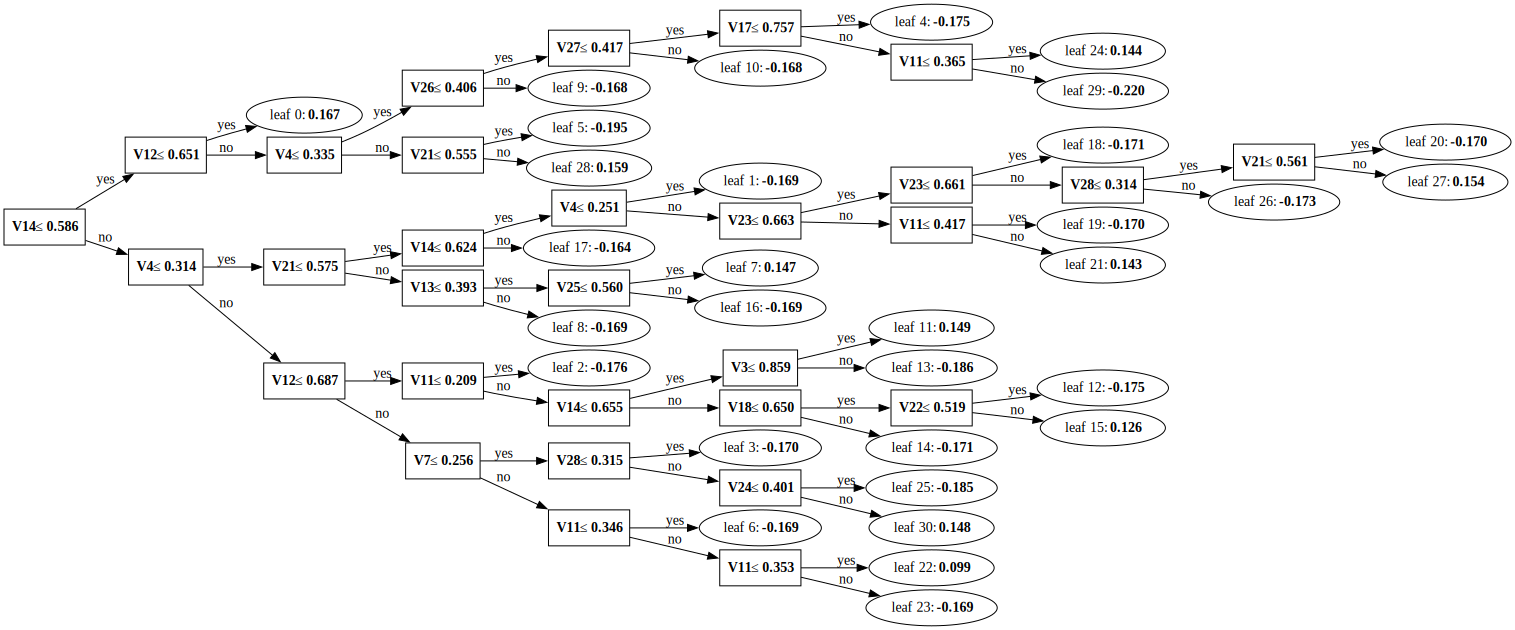

In [17]:
import graphviz
import os
# Extract the booster (raw model) from the LightGBM classifier
booster = model.booster_

# Generate the DOT format for a specific tree (e.g., tree 2)
tree_dot = booster.dump_model()["tree_info"][2]  # Extract the third tree (index starts from 0)

# Convert tree structure to DOT format
dot_data = lgb.create_tree_digraph(booster, tree_index=2)

# Save the dot file
dot_file_path = "lgbm_tree.dot"
with open(dot_file_path, "w") as f:
    f.write(dot_data.source)

# Use Graphviz to display the tree
graph = graphviz.Source(dot_data.source)
graph.render("lgbm_tree")

graph

In [39]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_val)
shap.summary_plot(shap_values, x_val)

/Users/ozge/PycharmProjects/ozge/kaggle/.env/lib/python3.9/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


(37974, 30)

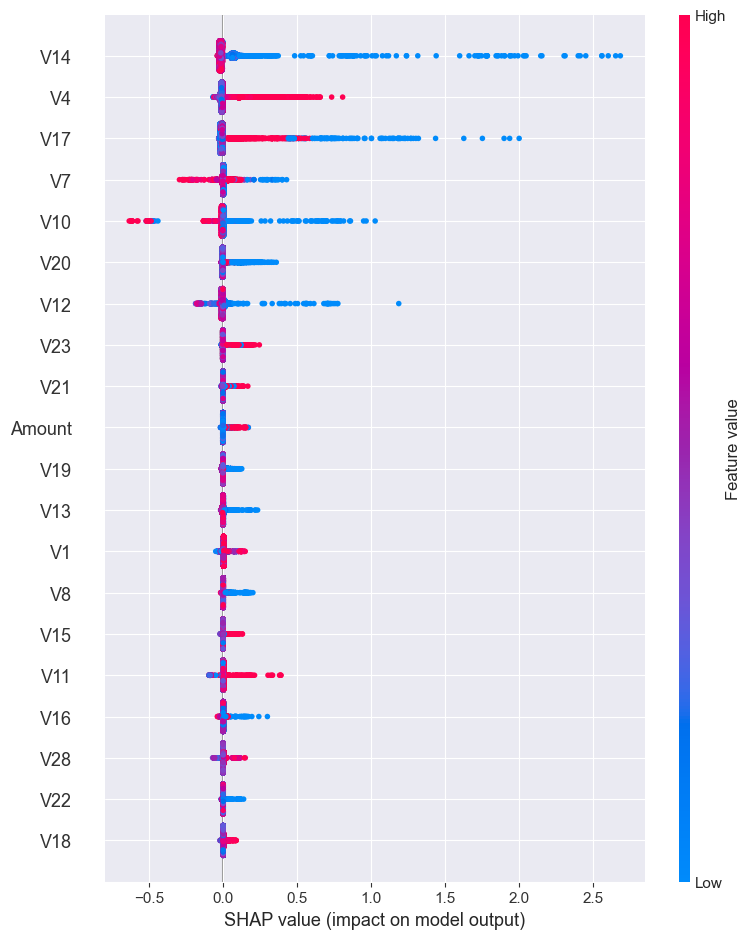

In [45]:
shap.summary_plot(shap_values, x_val)

   feature  importance
14     V14    0.004018
1       V1    0.002432
7       V7    0.002316
21     V21    0.000610
3       V3    0.000393
5       V5    0.000349
13     V13    0.000331
29  Amount    0.000289
20     V20    0.000288
26     V26    0.000266
9       V9    0.000229
6       V6    0.000176
17     V17    0.000173
8       V8    0.000163
18     V18    0.000136
22     V22    0.000105
2       V2    0.000065
27     V27    0.000031
24     V24    0.000006
19     V19    0.000004
16     V16   -0.000065
28     V28   -0.000083
25     V25   -0.000084
23     V23   -0.000126
15     V15   -0.000422
0     Time   -0.000441
11     V11   -0.000772
4       V4   -0.001105
12     V12   -0.002257
10     V10   -0.002356


In [41]:
shap.summary_plot(shap_values[1], x_val)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [17]:
import pandas as pd

In [18]:
# Historical payments dataset
df = pd.read_csv("https://hr-projects-assets-prod.s3.amazonaws.com/e985po285g/7fd7be209aabd2d29113db61b99fcc77/supervised_learning_challenge_data_840ad.csv")


In [19]:
df.to_csv("a.csv", index=False)

<Axes: xlabel='issuing_country', ylabel='count'>

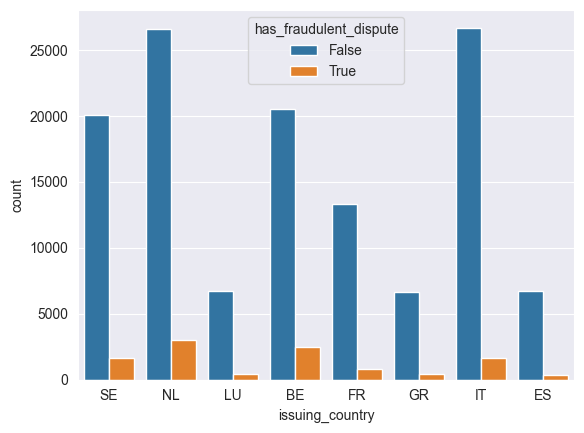

In [21]:
import seaborn as sns
sns.countplot(df, x="issuing_country", hue="has_fraudulent_dispute")
# sns.countplot(titanic, x="class")

<Axes: xlabel='issuing_country', ylabel='count'>

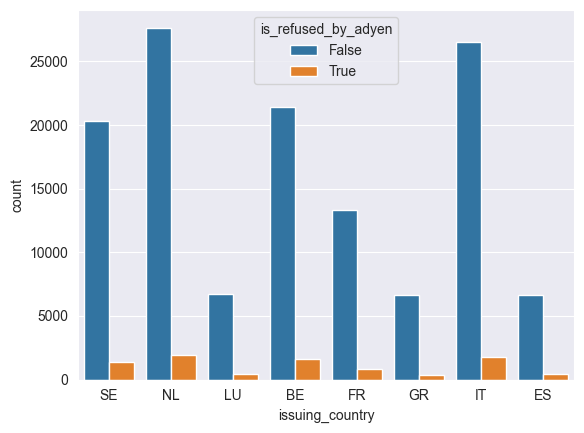

In [22]:
sns.countplot(df, x="issuing_country", hue="is_refused_by_adyen")